# Classification d’images  

* https://docs.google.com/document/d/1DFLRRamNrtYReVIj8FAtJvGrFsZZ8BP0f-e2YZn8hus/edit  

Un ami enseignant vous explique qu'il souhaiterait utiliser une application de labellisation automatique d'images pour l'assister dans ses ateliers avec des enfants de maternelle. Au fil des années, il a accumulé de très nombreuses images d'animaux permettant d'évoquer différents thèmes tels que la jungle, la forêt, la ferme etc. Malheureusement ces images ne sont pas triés et représentent 500 Go de données sur un disque dur ! En tant que scientifique et remplis d'empathie, vous vous dites que vous ne pouvez pas laisser votre ami chercher pendant plusieurs heures les photos qui lui permettront d'appréhender sereinement le thème de la ferme le lendemain. L’idée soudaine vous vient de créer un algorithme de classification d’images qui lui permettrait par la suite de labelliser automatiquement ses magnifiques images. Enthousiaste par votre brillante idée, vous commencez par vous congratuler, puis lui promettez de revenir vers lui dans quelques jours avec le logiciel qui va révolutionner son emploi du temps en lui évitant de nombreuses heures de recherches dans ses données !

Nous allons construire un modèle de base pour classer les images en fonction de leurs caractéristiques HOG. Ce projet va vous permettre de mettre en place des mécanismes d’automatisation de pipeline de données et de recherche de paramètres optimaux pour des modèles de classification. Cette méthodologie est générique et peut être appliquée à toutes sortes de problèmes d'apprentissage automatique.

**Références**  

* https://vcla.stat.ucla.edu/people/zhangzhang-si/HiT/exp5.html  
* https://zestedesavoir.com/tutoriels/1760/un-peu-de-machine-learning-avec-les-svm/  
* https://towardsdatascience.com/cat-or-dog-introduction-to-naive-bayes-c507f1a6d1a8  

**Ressources**

* https://kapernikov.com/tutorial-image-classification-with-scikit-learn/  
* https://github.com/bmurauer/pipelinehelper  
* https://stackoverflow.com/questions/24977071/open-image-from-online-save-to-server-flask  
* https://towardsdatascience.com/a-flask-app-for-image-recommendations-a865e1496a0d  
* https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7


## 1. Décompressez les données dans un dossier, qui sera le chemin source  

**Dataset**  

* https://vcla.stat.ucla.edu/people/zhangzhang-si/HiT/AnimalFace.zip  

## 2. Définissez une fonction " resize "  

Pour lire, redimensionner et stocker les données dans un dictionnaire, contenant les images, les étiquettes (animal), les noms de fichiers originaux et une description. 

Les images elles-mêmes seront stockées sous forme de tableaux numpy contenant leurs valeurs RVB. Le dictionnaire sera enregistré dans un fichier pickle à l'aide de la librairie joblib. La structure des données sera basée sur celle utilisée pour les ensembles de données de test dans scikit-learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import os
import pprint

pp = pprint.PrettyPrinter(indent=4)

* https://stackoverflow.com/questions/50313441/modulenotfounderror-no-module-named-tensorflow-examples  


In [2]:
import joblib
from skimage.io import imread
from skimage.transform import resize

def resize_all(src, pklname, include, width=150, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1}) animal images in RGB'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"./records/{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

In [3]:
# modify to fit your system
data_path = fr'{os.getenv("HOME")}/Briefes/BLOC2/20210204_PicturesClassification/data/AnimalFace/Image'
os.listdir(data_path)

['PigeonHead',
 'DeerHead',
 'PigHead',
 'HumanHead',
 'DogHead',
 'MouseHead',
 'PandaHead',
 'DuckHead',
 'Natural',
 'RabbitHead',
 'ElephantHead',
 'BearHead',
 'SheepHead',
 'ChickenHead',
 'EagleHead',
 'CowHead',
 'MonkeyHead',
 'WolfHead',
 'TigerHead',
 'LionHead',
 'CatHead']

## 3. Créer le jeu de données en vous servant de votre fonction " resize "  

Il y a pas mal d'animaux inclus dans le jeu de données, sélectionnez 8 classes d’animaux de votre choix. Nous définissons la largeur (et la hauteur) à 80 pixels.

In [4]:
base_name = 'animal_faces'
width = 150

include = {'ChickenHead', 'BearHead', 'ElephantHead', 
           'EagleHead', 'HumanHead', 'MonkeyHead', 'RabbitHead'}
 
resize_all(src=data_path, pklname=base_name, width=width, include=include)

HumanHead
RabbitHead
ElephantHead
BearHead
ChickenHead
EagleHead
MonkeyHead


## 4. Analysez le nouveau jeu de données  

(nombre d’échantillons, les éléments “clés” des données, taille des images, labels des images)

In [5]:
from collections import Counter

data = joblib.load(f'./records/{base_name}_{width}x{width}px.pkl')

print('number of samples :', len(data['data']))
print('keys :', list(data.keys()))
print('description :', data['description'])
print('image shape :', data['data'][0].shape)
print('labels :', np.unique(data['label']))

Counter(data['label'])

number of samples : 702
keys : ['description', 'label', 'filename', 'data']
description : resized (150x150) animal images in RGB
image shape : (150, 150, 3)
labels : ['Bear' 'Chicken' 'Eagle' 'Elephant' 'Human' 'Monkey' 'Rabbit']


Counter({'Human': 100,
         'Rabbit': 104,
         'Elephant': 100,
         'Bear': 101,
         'Chicken': 100,
         'Eagle': 97,
         'Monkey': 100})

## 5. Affichez un exemple de chaque animal inclus dans le jeu de données  

* Utilisez “np.unique” pour obtenir toutes les valeurs uniques dans la liste des étiquettes  
* Configurer la figure et les axes matplotlib, en fonction du nombre d'étiquettes  
* Faire un tracé pour chaque type d'étiquette. La méthode index renvoie l'index du premier élément correspondant à sa chaîne de recherche, label dans notre cas

Par convention, nous nommons les données d'entrée X et le résultat (étiquettes / labels) y :  
* X = np.array(data['data'])  
* y = np.array(data['label'])  

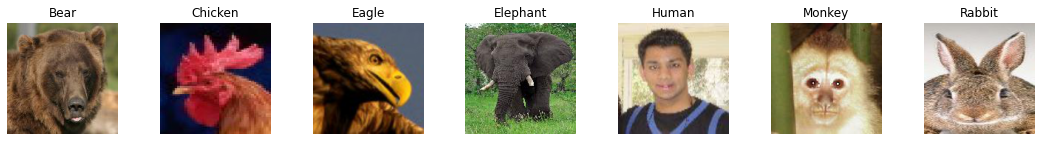

In [6]:
X = np.array(data['data'])
y = np.array(data['label'])

# use np.unique to get all unique values in the list of labels
labels = np.unique(y)

# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15, 4)
fig.tight_layout()

# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
    # print(ax, label, idx)
    ax.imshow(X[idx])
    ax.axis('off')
    ax.set_title(label)


## 6. Diviser vos données  

En un ensemble de test et un ensemble de train avec la fonction train_test_split de scikit-learn (80% de l'ensemble total pour l'entraînement et le reste pour l'ensemble de test). 

Dans l'ensemble de données, les photos sont classées par animal, nous ne pouvons donc pas simplement diviser à 80%, (si les données sont ordonnées et que nous nous divisons à une certaine position, nous nous retrouverons avec certains animaux (types) apparaissant dans un seul des deux ensembles).
Nous pouvons résoudre ce problème en mélangeant les données avant de les fractionner. De cette façon, nous égalisons les distributions dans l'ensemble de train et de test et les rendons comparables. La fonction “train_test_split” de sklearn fournit un paramètre shuffle pour prendre en charge cela tout en effectuant le fractionnement. “Random_state” amorce le mélange pour qu'il soit aléatoire, mais de manière reproductible.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

## 7. Distribution des photos  

Vérifier que la distribution des photos dans l'ensemble de formation et de test est similaire : examiner le nombre relatif de photos par catégorie.  
Que pensez-vous des distributions ?  
Existe-t-il un moyen de s’assurer de l’obtention de distributions égales dans l'ensemble d'apprentissage et de test ?

In [8]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
    
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100 * counts[sorted_index] / len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)


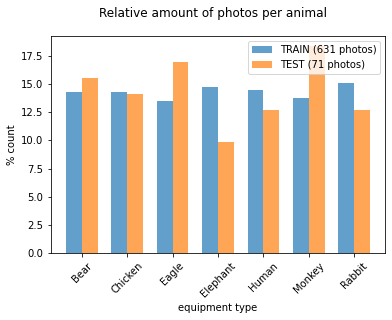

In [9]:
plt.suptitle('Relative amount of photos per animal')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend(['TRAIN ({0} photos)'.format(len(y_train)), 'TEST ({0} photos)'.format(len(y_test))])

***The distributions are not perfectly equal, but good enough for now. Note that our data set is quite small (~100 photos per category), so 1 or 2 photos difference in the test set will have a big effect on the distribution. For further improvement, we could also use the stratify parameter of train_test_split to ensure equal distributions in the training and test set***

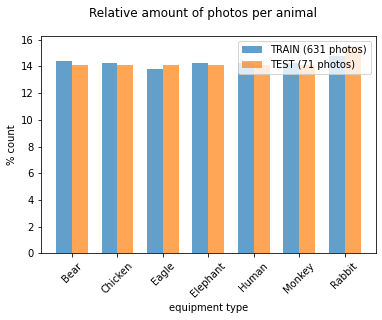

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    shuffle=True,
                                                    random_state=42,
                                                    stratify=y)
plt.suptitle('Relative amount of photos per animal')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend(['TRAIN ({0} photos)'.format(len(y_train)), 'TEST ({0} photos)'.format(len(y_test))])

## 8. Traitement des données  

Une approche classique de la reconnaissance d'objets est HOG-SVM, qui signifie Histogramme des dégradés orientés (Histogram of Oriented Gradients) et Support Vector Machines. Les HOG sont utilisés pour la réduction des caractéristiques, en d'autres termes : pour réduire la complexité du problème, tout en conservant autant de variations que possible.
Pour calculer un HOG, une image est divisée en blocs, par exemple 8 par 8 pixels. Pour chacun de ces blocs, la magnitude du gradient dans un nombre donné de directions est calculée. Pour une explication détaillée, vous pouvez vous référer à ce tutoriel :  

* http://www.learnopencv.com/histogram-of-oriented-gradients/.

Le nombre de points de données à traiter dans notre modèle a été réduit à ~ 15%, et avec un peu d'imagination, nous pouvons encore reconnaître un chien dans le HOG.

Les librairies utilisées sont les suivantes :
* from skimage.feature import hog  
* from skimage.io import imread  
* from skimage.transform import rescale  


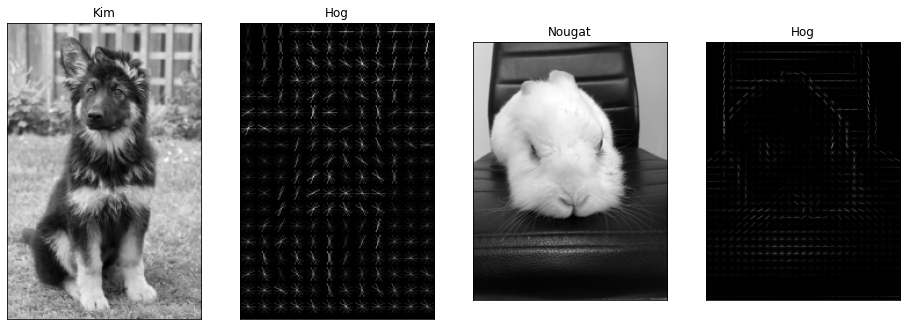

In [11]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale

# https://upload.wikimedia.org/wikipedia/commons/f/fa/Kim_at_14_weeks.jpg
rabbit = imread('./assets/nounou5.jpg', as_gray=True)
dog = imread('./assets/Kim_at_14_weeks.jpg', as_gray=True)

# scale down the image to one third
rabbit = rescale(rabbit, 1/4, mode='reflect')
dog = rescale(dog, 1/4, mode='reflect')

# calculate the hog and return a visual representation
rabbit_hog, rabbit_hog_img = hog(
    rabbit, pixels_per_cell=(14, 14),
    cells_per_block=(2, 2),
    orientations=9,
    visualize=True,
    block_norm='L2-Hys')

dog_hog, dog_hog_img = hog(
    dog, pixels_per_cell=(14, 14),
    cells_per_block=(2, 2),
    orientations=9,
    visualize=True,
    block_norm='L2-Hys')

fig, ax = plt.subplots(1, 4)
fig.set_size_inches(16, 12)

# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) for a in ax]

ax[0].imshow(dog, cmap='gray')
ax[0].set_title('Kim')
ax[1].imshow(dog_hog_img, cmap='gray')
ax[1].set_title('Hog')

ax[2].imshow(rabbit, cmap='gray')
ax[2].set_title('Nougat')
ax[3].imshow(rabbit_hog_img, cmap='gray')
ax[3].set_title('Hog')

plt.show()


In [12]:
print('Kim number of pixels\t\t', dog.shape[0] * dog.shape[1])
print('Kim number of hog features\t', dog_hog.shape[0])
print()
print('Nougat number of pixels\t\t', rabbit.shape[0] * rabbit.shape[1])
print('Nougat number of hog features\t', rabbit_hog.shape[0])

Kim number of pixels		 43008
Kim number of hog features	 6732

Nougat number of pixels		 190512
Nougat number of hog features	 32760


Lors du calcul du HOG, nous effectuons une transformation. Nous pouvons transformer l'ensemble de notre ensemble de données à l'aide de transformateurs. Les transformateurs sont des objets qui se servent dans le tableau de données, transforment chaque élément et renvoient les données résultantes.

Ici, nous devons convertir les images couleur en niveaux de gris, calculer leurs HOG et enfin mettre à l'échelle les données. Pour cela, nous utilisons trois transformateurs à la suite: RGB2GrayTransformer, HOGTransformer et StandardScaler. Le résultat final est un tableau avec un HOG pour chaque image de l'entrée.

Scikit-learn est livré avec de nombreux transformateurs intégrés, tels qu'un StandardScaler pour mettre à l'échelle des entités et un Binarizer pour mapper des entités de chaîne à des entités numériques. De plus, il fournit les classes BaseEstimator et TransformerMixin pour faciliter la création de vos propres Transformers.
Un transformateur personnalisé peut être créé en héritant de ces deux classes (BaseEstimator, TransformerMixin) et en implémentant une méthode __init__, fit() et transform(). La classe TransformerMixin fournit la méthode fit_transform(), qui combine l'ajustement et la transformation que nous avons implémentés.

# Créer vos classes  RGB2GrayTransformer & HOGTransformer  

Après avoir instancié chaque transformateur (RGB2GrayTransformer(), HogTransformer(), StandardScaler()), mettre à l’échelle votre échantillon de données en appelant fit_transform() à chaque transformation en convertissant X_train étape par étape (RGB2GrayTransformer, puis HogTransformer, puis StandardScaler).

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from skimage import color


class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """

    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self

    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])


class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """

    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)

        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])


In [14]:
from sklearn.preprocessing import Normalizer
import skimage

# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(pixels_per_cell=(14, 14), cells_per_block=(2,2), orientations=9, block_norm='L2-Hys')
normalify = Normalizer()

# call fit_transform on each transform converting X_train step by step
print('Shape BEFORE preprocess\t', X_train.shape)
X_train_gray = grayify.fit_transform(X_train)
print('Shape after GRAYIFYING\t', X_train_gray.shape)
X_train_hog = hogify.fit_transform(X_train_gray)
print('Shape after HOGIFYING\t', X_train_hog.shape)
X_train_prepared = normalify.fit_transform(X_train_hog)
print('Shape after NORMALIFYING', X_train_prepared.shape)

Shape BEFORE preprocess	 (631, 150, 150, 3)
Shape after GRAYIFYING	 (631, 150, 150)
Shape after HOGIFYING	 (631, 2916)
Shape after NORMALIFYING (631, 2916)


## 9. Entraîner un classifieur  

Nous commencerons par Stochastic Gradient Descent (SGD), car il est rapide et fonctionne relativement bien.

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

## 10. Évaluer les faux positifs grâce à une matrice de confusion

In [16]:
X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = normalify.transform(X_test_hog)

y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:25])
print('')
print('CORRECT % = ', (100*np.sum(y_pred == y_test)/len(y_test)).round(2))

[ True  True  True False  True  True  True  True  True  True  True False
 False  True  True False  True  True False  True  True  True  True False
  True]

CORRECT % =  87.32


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

print('CLASSIFICATION REPORT\n\n', classification_report(y_test, y_pred))
print('\nCONFUSION MATRIX\n\n', confusion_matrix(y_test, y_pred))

CLASSIFICATION REPORT

               precision    recall  f1-score   support

        Bear       1.00      0.80      0.89        10
     Chicken       1.00      0.70      0.82        10
       Eagle       1.00      1.00      1.00        10
    Elephant       1.00      0.80      0.89        10
       Human       0.91      1.00      0.95        10
      Monkey       0.59      1.00      0.74        10
      Rabbit       0.90      0.82      0.86        11

    accuracy                           0.87        71
   macro avg       0.91      0.87      0.88        71
weighted avg       0.91      0.87      0.88        71


CONFUSION MATRIX

 [[ 8  0  0  0  0  2  0]
 [ 0  7  0  0  0  3  0]
 [ 0  0 10  0  0  0  0]
 [ 0  0  0  8  0  1  1]
 [ 0  0  0  0 10  0  0]
 [ 0  0  0  0  0 10  0]
 [ 0  0  0  0  1  1  9]]


* 2 FP Bear = 2 Monkey
* 3 FP Chicken = 3 Monkey
* 0 FP Eagle :-)
* 2 FP Elephant = 1 Monkey + 1 Rabbit
* 0 FP Human :-)
* 0 FP Monkey :-)
* 2 FP Rabbit = 1 Human + 1 Monkey

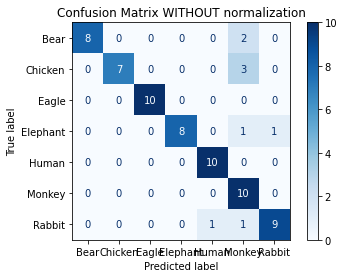

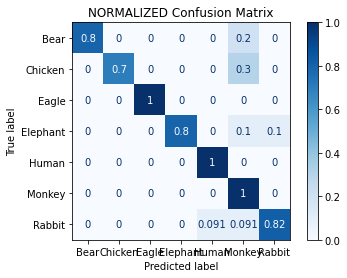

In [18]:
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)
titles_options = [("Confusion Matrix WITHOUT normalization", None),
                  ("NORMALIZED Confusion Matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(sgd_clf, X_test_prepared, y_test,
                          display_labels=labels,
                          cmap=plt.cm.Blues,
                          normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

In [19]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
 
def my_plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()
 
    np.fill_diagonal(cmx_zero_diag, 0)
 
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(len(cmx)+1)) for a in ax]
    [a.set_yticks(range(len(cmx)+1)) for a in ax]
         
    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('As is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')
 
    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1) 
                        for divider in dividers]
 
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()



 ['Bear', 'Chicken', 'Eagle', 'Elephant', 'Human', 'Monkey', 'Rabbit']


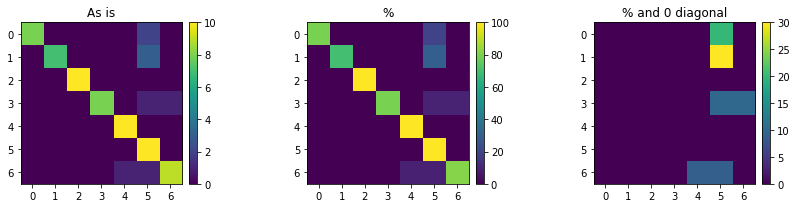

In [20]:
cmx = confusion_matrix(y_test, y_pred)
my_plot_confusion_matrix(cmx)
 
# the types appear in this order
print('\n', sorted(np.unique(y_test)))

## 11. Mettre en place un pipeline  
qui pré-traite les données (RGB2GrayTransformer(), HogTransformer(), StandardScaler()), entraîne le modèle et nous permet de modifier les paramètres plus facilement.

En utilisant un pipeline, nous pouvons optimiser à la fois les transformations et le classifieur en une seule procédure. De plus, au lieu de modifier manuellement les paramètres, nous pouvons utiliser un GridSearchCV.

In [21]:
from pipelinehelper import PipelineHelper
from sklearn.pipeline import Pipeline
from sklearn import svm

HOG_pipeline = Pipeline([
    ('grayify', RGB2GrayTransformer()),
    ('hogify', HogTransformer(
        pixels_per_cell=(14, 14),
        cells_per_block=(2, 2),
        orientations=9,
        block_norm='L2-Hys')
    ),
    ('normalify', Normalizer()),
    ('classify', SGDClassifier(random_state=42))
])

clf = HOG_pipeline.fit(X_train, y_train)
print('CORRECT % =', (100*np.sum(clf.predict(X_test) == y_test)/len(y_test)).round(2))

CORRECT % = 87.32


## 12. Pour cela, définir une grille de paramètres (param_grid = [{...}])

In [22]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

param_grid = [
    {
    'hogify__orientations': [7, 8],
    'hogify__cells_per_block': [(3, 3), (4, 4)],
    'hogify__pixels_per_cell': [(6, 6), (8, 8)],
    },
    {
        'hogify__orientations': [8],
        'hogify__cells_per_block': [(3, 3)],
        'hogify__pixels_per_cell': [(8, 8)],
        'classify': [SGDClassifier(n_jobs=-1, random_state=42),
                     SVC(kernel='linear', random_state=42),
                     GaussianNB()
                    ]
    }
]

## 13. Évaluer dans le même objet Grid Search

Le classifieur SGD, le classifieur SVM, ainsi qu’un classifieur Naïve Bayes.  

Une fois le Grid Search terminé, le modèle sera entraîné une dernière fois, en utilisant l'ensemble complet d'apprentissage et les paramètres optimaux.  

Que pouvez-vous conclure de ces modèles, en étudiant le fonctionnement intrinsèque du SVM et du Naive Bayes, est-on capable d’anticiper quel algorithme sera le plus efficace pour cette tâche de classification d’images ? 

In [23]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(HOG_pipeline,
                           param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1,
                           return_train_score=True)
 
grid_res = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


## 14. Évaluer les résultats des modèles  

Avec paramètres optimaux calculés par le Grid Search, quel classifieur offre de meilleurs scores pour cette tâche ?

In [24]:
model = grid_res.best_estimator_
model

Pipeline(steps=[('grayify', RGB2GrayTransformer()),
                ('hogify', HogTransformer(orientations=8)),
                ('normalify', Normalizer()),
                ('classify', SVC(kernel='linear', random_state=42))])

In [25]:
grid_res.best_params_

{'classify': SVC(kernel='linear', random_state=42),
 'hogify__cells_per_block': (3, 3),
 'hogify__orientations': 8,
 'hogify__pixels_per_cell': (8, 8)}

In [26]:
print('BEST classifier SCORE = {:.2%}'.format(grid_res.best_score_))

BEST classifier SCORE = 89.54%


[[ 7  0  0  0  0  3  0]
 [ 0 10  0  0  0  0  0]
 [ 0  1  9  0  0  0  0]
 [ 0  0  0  9  0  0  1]
 [ 0  0  0  0 10  0  0]
 [ 0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0 11]]


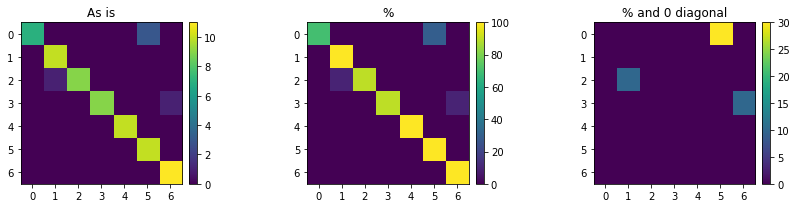

In [27]:
best_pred = grid_res.best_estimator_.predict(X_test)
cmx = confusion_matrix(y_test, best_pred)
print(cmx)
my_plot_confusion_matrix(cmx)


 Pipeline(steps=[('grayify', RGB2GrayTransformer()),
                ('hogify', HogTransformer(orientations=8)),
                ('normalify', Normalizer()),
                ('classify', SGDClassifier(n_jobs=-1, random_state=42))])

 CORRECT % = 94.37

 [[ 8  0  0  0  0  2  0]
 [ 0  9  1  0  0  0  0]
 [ 0  0 10  0  0  0  0]
 [ 0  0  0  9  0  0  1]
 [ 0  0  0  0 10  0  0]
 [ 0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0 11]] 


 Pipeline(steps=[('grayify', RGB2GrayTransformer()),
                ('hogify', HogTransformer(orientations=8)),
                ('normalify', Normalizer()), ('classify', GaussianNB())])

 CORRECT % = 92.96

 [[ 8  0  0  0  0  2  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0 10  0  0  0  0]
 [ 0  0  0  9  0  0  1]
 [ 0  0  0  0  9  1  0]
 [ 0  0  0  0  0 10  0]
 [ 1  0  0  0  0  0 10]] 


 Pipeline(steps=[('grayify', RGB2GrayTransformer()),
                ('hogify', HogTransformer(orientations=8)),
                ('normalify', Normalizer()),
                ('classify', SVC(k

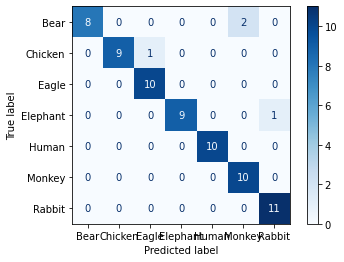

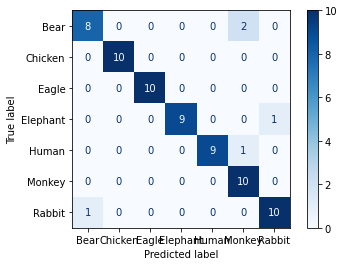

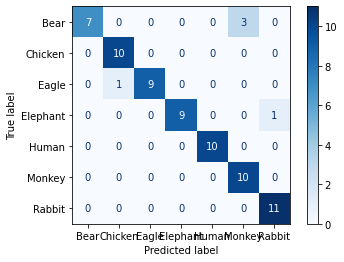

In [28]:
clf1 = SGDClassifier(n_jobs=-1, random_state=42)
clf2 = GaussianNB()
clf3 = SVC(kernel='linear', random_state=42)
clf_list = [clf1, clf2, clf3]

for clf in clf_list:
    HOG_pipeline = Pipeline([('grayify', RGB2GrayTransformer()),
                             ('hogify', HogTransformer(pixels_per_cell=(8, 8),
                                                       cells_per_block=(3, 3),
                                                       orientations=8,
                                                       block_norm='L2-Hys')),
                             ('normalify', Normalizer()),
                             ('classify', clf)
                            ])
    
    model = HOG_pipeline.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    print('\n', model)
    print('\n', 'CORRECT % =', (100*np.sum(pred == y_test)/len(y_test)).round(2))
    
    cmx = confusion_matrix(y_test, pred)
    print('\n', cmx, '\n')
    print(plot_confusion_matrix(model, X_test, y_test,
                          display_labels=labels,
                          cmap=plt.cm.Blues,
                          normalize=None))


***Altough GridSearch returns SVM as BEST estimator, PREDICTIONS are BETTER with NAIVE BAYES model !!!***  
***Dev IA mascot NOUGAT (RGBA .jpg) in train set decreases performances ???***

## 15. Enregistrer vos résultats dans un fichier pickle (joblib)  

Afin de pouvoir recharger les résultats lorsque vous en aurez besoin (par ex avec Heroku).

In [29]:
from datetime import datetime

now = datetime.now()

# save the model to disk
joblib.dump(grid_res, './records/{}-picture_labelisation-hog_gscv.pkl'.format(now))

['./records/2021-03-25 09:08:00.709702-picture_labelisation-hog_gscv.pkl']

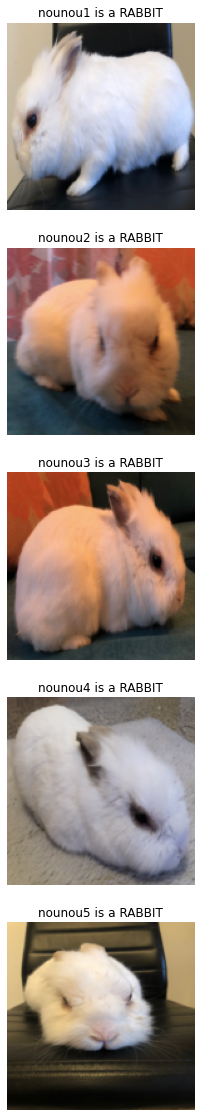

In [30]:
fig, axs = plt.subplots(5, 1, figsize=(20, 20))
for i in range(1, 6):
#for i in [5]:
    name = "nounou{}".format(i)
    nougat = imread('./assets/{}.jpg'.format(name), as_gray=False)
    nougat = resize(nougat, (150, 150))
    pred = model.predict([nougat])
    axs[i-1].imshow(nougat)
    axs[i-1].axis('off')
    axs[i-1].set_title('{} is a {}'.format(name, str.upper(pred[0])))


## 16. Créer votre propre dataset  

Avec des images provenant de Google Image, appliquer votre pipeline sur ce nouveau jeu de données. Au besoin, relancer un Grid Search.

## 17. Keras TensorFlow  

Vous vous rendez compte rapidement que la tâche de classification en Machine Learning atteint rapidement des limites de performance. Ne serait-ce pas le moment idéal pour poursuivre ce travail avec les réseaux neuronaux et plus spécifiquement les réseaux convolutionnels.  

La première étape est de réaliser une veille sur les réseaux neuronaux convolutionnels :  
* https://openclassrooms.com/fr/courses/4470531-classez-et-segmentez-des-donnees-visuelles/5082166-quest-ce-quun-reseau-de-neurones-convolutif-ou-cnn  
* https://medium.datadriveninvestor.com/introduction-to-how-cnns-work-77e0e4cde99b  

La première implémentation se fera à l’aide de l’api Keras (Tensorflow).  
Nous pourrons nous aider de ce tutoriel proposé par Keras pour mettre en place notre classifieur :  
* https://keras.io/examples/vision/image_classification_from_scratch/  

Pour pouvoir comparer réellement des performances de classifieurs (notamment ML vs DL), il est nécessaire de les paramétrer finement :  
* https://blog.floydhub.com/guide-to-hyperparameters-search-for-deep-learning-models/  
* https://medium.com/@am.benatmane/keras-hyperparameter-tuning-using-sklearn-pipelines-grid-search-with-cross-validation-ccfc74b0ce9f


In [31]:
base_name = 'animal_faces'
width = 32

include = {'ChickenHead', 'BearHead', 'ElephantHead', 
           'EagleHead', 'HumanHead', 'MonkeyHead', 'RabbitHead'}
 
resize_all(src=data_path, pklname=base_name, width=width, include=include)

HumanHead
RabbitHead
ElephantHead
BearHead
ChickenHead
EagleHead
MonkeyHead


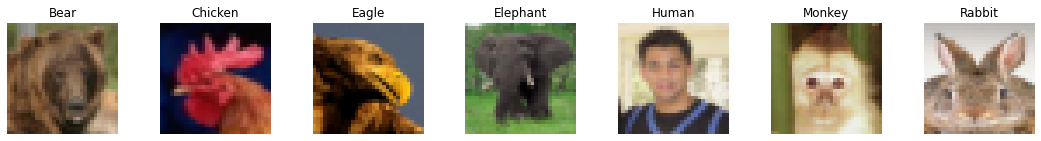

In [32]:
data = joblib.load(f'./records/{base_name}_{width}x{width}px.pkl')

X = np.array(data['data'])
y = np.array(data['label'])

# use np.unique to get all unique values in the list of labels
labels = np.unique(y)

# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15, 4)
fig.tight_layout()

# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
    # print(ax, label, idx)
    ax.imshow(X[idx])
    ax.axis('off')
    ax.set_title(label)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    shuffle=True,
                                                    random_state=42,
                                                    stratify=y)

In [34]:
from sklearn.preprocessing import StandardScaler


# call fit_transform on each transform converting TRAIN batch step by step
print('Shape BEFORE preprocess\t', X_train.shape)
X_train = grayify.fit_transform(X_train)
print('Shape after GRAYIFYING\t', X_train.shape)
#X_train = normalify.fit_transform(X_train_gray)
#print('Shape after NORMALIFYING', X_train.shape)

# call fit_transform on each transform converting TEST batch step by step
print('Shape BEFORE preprocess\t', X_test.shape)
X_test = grayify.fit_transform(X_test)
print('Shape after GRAYIFYING\t', X_test.shape)
#X_test = normalify.fit_transform(X_test_gray)
#print('Shape after NORMALIFYING', X_test.shape)

Shape BEFORE preprocess	 (631, 32, 32, 3)
Shape after GRAYIFYING	 (631, 32, 32)
Shape BEFORE preprocess	 (71, 32, 32, 3)
Shape after GRAYIFYING	 (71, 32, 32)


In [35]:
X_train = X_train.reshape(-1, width, width, 1)
X_test = X_test.reshape(-1, width, width, 1)
print("TRAIN Shape = {}\nTEST Shape = {}".format(X_train.shape, X_test.shape))

TRAIN Shape = (631, 32, 32, 1)
TEST Shape = (71, 32, 32, 1)


In [36]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

print('y_train', y_train.shape, type(y_train))
print('y_test', y_test.shape, type(y_test))

y_train (631,) <class 'numpy.ndarray'>
y_test (71,) <class 'numpy.ndarray'>


* https://github.com/tensorflow/tensorflow/issues/30397  


In [37]:
from tensorflow.keras.utils import to_categorical

# Conversion NEEDED before load into model !
# See link below & above
# https://github.com/tensorflow/tensorflow/issues/30397
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('y_train', y_train.shape, type(y_train))
print('y_test', y_test.shape, type(y_test))

y_train (631, 7) <class 'numpy.ndarray'>
y_test (71, 7) <class 'numpy.ndarray'>


In [38]:
print("TRAIN set IMAGES shape: {}".format(X_train.shape))
print("TRAIN set LABELS shape: {}".format(y_train.shape))
print("TEST set IMAGES shape: {}".format(X_test.shape))
print("TEST set LABELS shape: {}".format(y_test.shape))

TRAIN set IMAGES shape: (631, 32, 32, 1)
TRAIN set LABELS shape: (631, 7)
TEST set IMAGES shape: (71, 32, 32, 1)
TEST set LABELS shape: (71, 7)


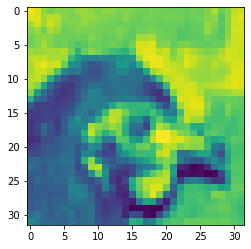

In [39]:
import random

rand_ind = random.randrange(X_train.shape[0] - 1)
img = np.reshape(X_train[rand_ind], (width, width))
plt.imshow(img)

In [40]:
print("Max Value: {}\nMin Value: {}".format(np.max(img), np.min(img)))

Max Value: 0.7788941957720595
Min Value: 0.10861337622549058


# Convolutional Neural Networks — the ELI5 way

## CNN Ressources

* https://github.com/ss-is-master-chief/MNIST-Digit.Recognizer-CNNs  
* https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53  


In [41]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.datasets as tfds

# Global variables
epochs = 15
learning_rate = 0.001
batch_size = 8

# Input dimension = image size in pixels
n_input = int(width)

# 7 labels to classify
# 'Bear' 'Chicken' 'Eagle' 'Elephant' 'Human' 'Monkey' 'Rabbit'
n_classes = len(labels)

* https://stackoverflow.com/questions/37383812/tensorflow-module-object-has-no-attribute-placeholder  
* https://stackoverflow.com/questions/56561734/runtimeerror-tf-placeholder-is-not-compatible-with-eager-execution  


In [42]:
# https://stackoverflow.com/questions/56561734/runtimeerror-tf-placeholder-is-not-compatible-with-eager-execution
tf.compat.v1.disable_eager_execution()

# https://stackoverflow.com/questions/37383812/tensorflow-module-object-has-no-attribute-placeholder
x = tf.compat.v1.placeholder(shape=[None, n_input, n_input, 1], dtype=tf.float32)
y = tf.compat.v1.placeholder(shape=[None, n_classes], dtype=tf.int32)

In [43]:
def conv2d(x, W, b, stride=1):
    x = tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding="SAME")
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k , k , 1], strides=[1, k , k, 1], padding="SAME")

* https://github.com/tensorflow/addons/issues/414  
* https://github.com/tensorflow/models/issues/7767  
* https://stackoverflow.com/questions/64159220/typeerror-variable-v2-call-got-an-unexpected-keyword-argument-initializer  
* https://stackoverflow.com/questions/55322754/how-to-do-weight-initialization-by-xavier-rule-in-tensorflow-2-0  


In [44]:
# initializer=tf.contrib.layers.xavier_initializer() DOESN'T WORK !!!
# See links below :
# https://github.com/tensorflow/addons/issues/414  
# https://github.com/tensorflow/models/issues/7767  
# https://stackoverflow.com/questions/64159220/typeerror-variable-v2-call-got-an-unexpected-keyword-argument-initializer  
# https://stackoverflow.com/questions/55322754/how-to-do-weight-initialization-by-xavier-rule-in-tensorflow-2-0  

weights = {
    'wc1': tf.compat.v1.get_variable('W0', shape=(3, 3, 1, 32), initializer=tf.initializers.glorot_uniform()),
    'wc2': tf.compat.v1.get_variable('W1', shape=(3, 3, 32, 64), initializer=tf.initializers.glorot_uniform()),
    'wc3': tf.compat.v1.get_variable('W2', shape=(3, 3, 64, 128), initializer=tf.initializers.glorot_uniform()),
    'wd1': tf.compat.v1.get_variable('W3', shape=(4 * 4 * 128, 128), initializer=tf.initializers.glorot_uniform()),
    'out': tf.compat.v1.get_variable('W4', shape=(128, n_classes), initializer=tf.initializers.glorot_uniform())
}

biases = {
    'bc1': tf.compat.v1.get_variable('B0', shape=(32), initializer=tf.initializers.glorot_uniform()),
    'bc2': tf.compat.v1.get_variable('B1', shape=(64), initializer=tf.initializers.glorot_uniform()),
    'bc3': tf.compat.v1.get_variable('B2', shape=(128), initializer=tf.initializers.glorot_uniform()),
    'bd1': tf.compat.v1.get_variable('B3', shape=(128), initializer=tf.initializers.glorot_uniform()),
    'out': tf.compat.v1.get_variable('B4', shape=(n_classes), initializer=tf.initializers.glorot_uniform()),
}


In [45]:
def conv_net(x, weights, biases):
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)
    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    conv3 = maxpool2d(conv3, k=2)
    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [46]:
pred = conv_net(x, weights, biases)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [47]:
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [48]:
init = tf.compat.v1.global_variables_initializer()

In [49]:
import time

with tf.compat.v1.Session() as sess:
    sess.run(init) 
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.compat.v1.summary.FileWriter('./Output', sess.graph)

    t1 = time.process_time()

    for i in range(epochs):
        for batch in range(len(X_train)//batch_size):
            batch_x = X_train[batch*batch_size:min((batch+1)*batch_size, len(X_train))]
            batch_y = y_train[batch*batch_size:min((batch+1)*batch_size, len(y_train))]
            opt = sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x, y: batch_y})

        print("Iter " + str(i) + ", Loss = " + \
                      "{:.6f}".format(loss) + "\nTRAIN Accuracy = " + \
                      "{:.2%}".format(acc))
        print("Optimization Finished!")

        test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: X_test,y : y_test})
        train_loss.append(loss)
        test_loss.append(valid_loss)
        train_accuracy.append(acc)
        test_accuracy.append(test_acc)

        print("TEST Accuracy =","{:.2%}".format(test_acc))
        print("--------------------------------------------------------")

    t2 = time.process_time()
    epochs_time = t2 - t1
    print('Time execution for {} epochs = {:.0f} (s)'.format(epochs, epochs_time))

    summary_writer.close()


Iter 0, Loss = 1.659453
TRAIN Accuracy = 50.00%
Optimization Finished!
TEST Accuracy = 25.35%
--------------------------------------------------------
Iter 1, Loss = 1.390868
TRAIN Accuracy = 50.00%
Optimization Finished!
TEST Accuracy = 32.39%
--------------------------------------------------------
Iter 2, Loss = 1.190862
TRAIN Accuracy = 62.50%
Optimization Finished!
TEST Accuracy = 42.25%
--------------------------------------------------------
Iter 3, Loss = 1.032547
TRAIN Accuracy = 50.00%
Optimization Finished!
TEST Accuracy = 49.30%
--------------------------------------------------------
Iter 4, Loss = 0.844580
TRAIN Accuracy = 62.50%
Optimization Finished!
TEST Accuracy = 53.52%
--------------------------------------------------------
Iter 5, Loss = 0.655172
TRAIN Accuracy = 87.50%
Optimization Finished!
TEST Accuracy = 54.93%
--------------------------------------------------------
Iter 6, Loss = 0.481401
TRAIN Accuracy = 87.50%
Optimization Finished!
TEST Accuracy = 56.34%


In [50]:
plt.style.use('ggplot')

def plot_history(train_loss, test_loss, train_accuracy, test_accuracy):
    acc = train_accuracy
    val_acc = test_accuracy
    loss = train_loss
    val_loss = test_loss
    x = range(len(train_loss))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='TRAIN')
    plt.plot(x, val_acc, 'r', label='TEST')
    plt.title('ACCURACY', fontsize=20)
    plt.xlabel('Epoch',fontsize=12)
    plt.ylabel('Accuracy',fontsize=12)
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='TRAIN')
    plt.plot(x, val_loss, 'r', label='TEST')
    plt.title('LOSS', fontsize=20)
    plt.xlabel('epochs',fontsize=12)
    plt.ylabel('loss',fontsize=12)
    plt.legend()

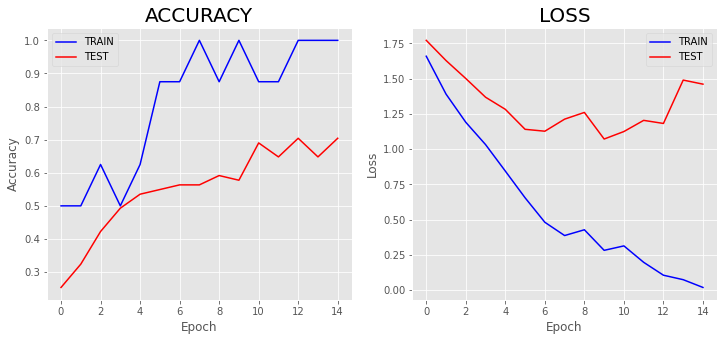

In [51]:
plot_history(train_loss, test_loss, train_accuracy, test_accuracy)

## CNN Optimization  

* https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7

## Data Augmentation  

* https://machinelearningmastery.com/image-augmentation-deep-learning-keras/  


Pytorch est une Framework de machine Learning qui offre de très bonnes performances.  
Vous pouvez l’installer de la façon suivante :  
* https://pytorch.org/get-started/locally/  

Puis le tester en l’adaptant sur notres tâche de classification d’images :  
* https://www.pluralsight.com/guides/image-classification-with-pytorch  


# Développer une interface utilisateur

Dash permettant de charger une image, puis de retourner le label de l’image (la classe).

# Quelles seraient les adaptations à faire pour offrir un logiciel de labellisation automatique ?  

* Proposer un cahier des charges précis.  
* Proposer une implémentation (une mise en œuvre)  
* Réfléchir à la manière la plus appropriée de stocker les libellés des images afin que ceux-ci soient indépendant de l’application sur ...

# Tests  

Après avoir réalisé une veille sur les tests unitaires, fonctionnels, de non-régression, programmer vos tests unitaires et fonctionnels.

# Google Image  

Afin de trouver facilement les images qui lui permettront d’appuyer ces présentations pédagogiques aux enfants de sa classe, votre ami souhaite une application similaire à Google Image dédiée à ses images contenues sur son disque dur. Que pouvez-vous lui proposer ? Quelles sont les types d’algorithmes qui permettent de réaliser ce type d’application ?

# Réfléchir à une solution de stockage des images

# Programmer votre propre application Google Image !!!!  